In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.integrate import odeint
import scipy.odr
import scipy
import statistics as st
import math
from matplotlib.pylab import *
from tabulate import tabulate

Delta S for 0/100: -392.4 J/K mol
Delta H for 0/100: -3.521 J/mol
Delta G for 0/100: [224.900539 228.824539 232.748539 236.672539 240.596539 244.520539] kJ/mol
Delta S for 25/75: -246.5 J/K mol
Delta H for 25/75: 81.0 J/mol
Delta G for 25/75: [141.362475 143.827475 146.292475 148.757475 151.222475 153.687475] kJ/mol
Delta S for 50/50: -239.8 J/K mol
Delta H for 50/50: 84.57 J/mol
Delta G for 50/50: [137.52594 139.92394 142.32194 144.71994 147.11794 149.51594] kJ/mol
Delta S for 75/25: -170.8 J/K mol
Delta H for 75/25: 121.0 J/mol
Delta G for 75/25: [ 98.01502  99.72302 101.43102 103.13902 104.84702 106.55502] kJ/mol
Delta S for 100/0: -168.5 J/K mol
Delta H for 100/0: 123.3 J/mol
Delta G for 100/0: [ 96.699075  98.384075 100.069075 101.754075 103.439075 105.124075] kJ/mol


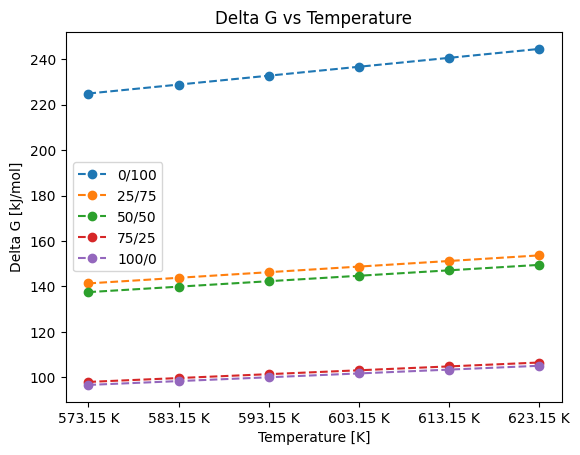

In [2]:

materials = {
    '0/100': [-3.924e+02, -3.521e+00,  1.076e-01], 
    '25/75': [-2.465e+02,  8.100e+01,  7.618e-04],
    '50/50':  [-2.398e+02,  8.457e+01, -4.659e-03],
    '75/25': [-1.708e+02,  1.210e+02, -3.393e-02],   
    '100/0': [-1.685e+02,  1.233e+02, -3.849e-02],
}

h = 6.62607015e-34  # Js
kB = 1.380649e-23  # J/K
R = 8.314  # J/mol

temp_list = np.array([573.15, 583.15, 593.15, 603.15, 613.15, 623.15])

for material, b_values in materials.items():

    dS=b_values[0]
    print(f'Delta S for {material}: {dS} J/K mol')

    dH = b_values[1]
    print(f'Delta H for {material}: {dH} J/mol')

    dG = dH - temp_list * dS
    print(f'Delta G for {material}: {dG/1000} kJ/mol')

    plt.plot(temp_list, dG/1000, marker='o', linestyle='--', label=material)


plt.xlabel('Temperature [K]')
plt.ylabel('Delta G [kJ/mol]')
plt.title('Delta G vs Temperature')
plt.xticks(temp_list, [f'{temp} K' for temp in temp_list])
plt.legend()
plt.show()


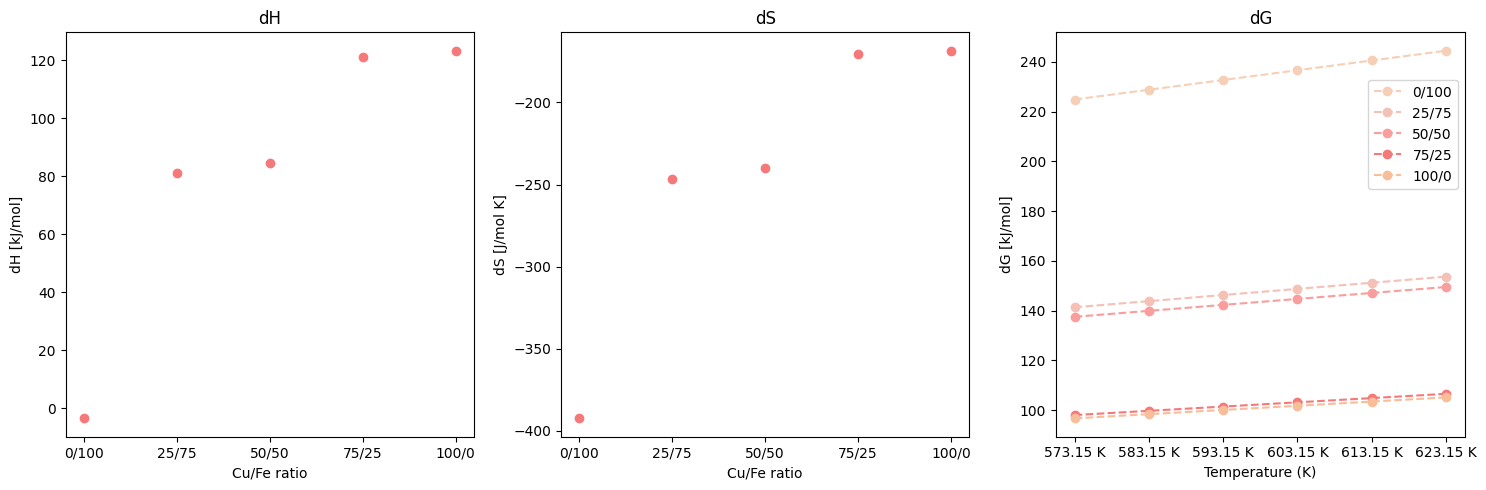

In [3]:

h = 6.62607015e-34  # Js
kB = 1.380649e-23   # J/K
R = 8.314           # J/mol

temp_list = np.array([573.15, 583.15, 593.15, 603.15, 613.15, 623.15])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors=['#f5cfb6','#f5c0b6', '#f99d9d', '#f57979', '#f7be99']

for idx, (material, b_values) in enumerate(materials.items()):
    dH = b_values[1]
    axs[0].scatter(idx, dH, label=material, color='#f57979')

    dS = b_values[0]
    axs[1].scatter(idx, dS, label=material, color='#f57979')

    dG = dH - temp_list * dS
    axs[2].plot(temp_list, dG/1000, marker='o', linestyle='--', label=material, color=colors[idx])

axs[0].set_xlabel('Cu/Fe ratio')
axs[0].set_ylabel('dH [kJ/mol]')
axs[0].set_title('dH')

axs[1].set_xlabel('Cu/Fe ratio')
axs[1].set_ylabel('dS [J/mol K]')
axs[1].set_title('dS')

axs[2].set_xlabel('Temperature (K)')
axs[2].set_ylabel('dG [kJ/mol]')
axs[2].set_title('dG')

axs[2].set_xticks(temp_list)
axs[2].set_xticklabels([f'{temp} K' for temp in temp_list])

axs[0].set_xticks(np.arange(len(materials)))
axs[0].set_xticklabels(list(materials.keys()), ha='center')
axs[1].set_xticks(np.arange(len(materials)))
axs[1].set_xticklabels(list(materials.keys()), ha='center')

axs[2].legend(loc='upper right', bbox_to_anchor=(1, 0.9))


plt.tight_layout()
plt.show()


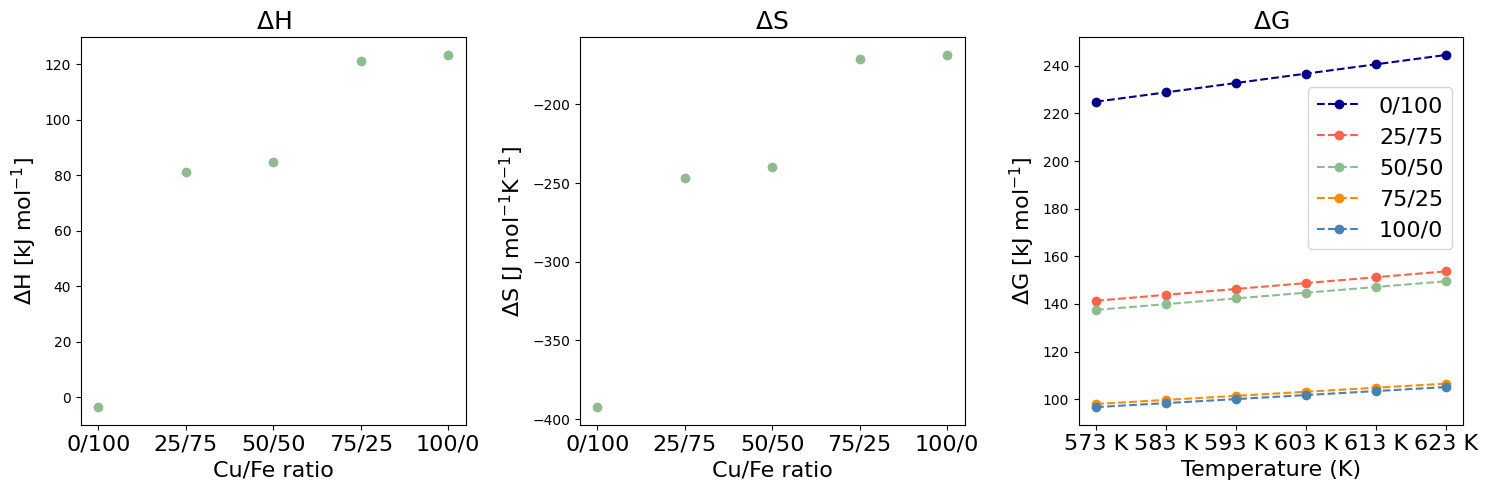

In [5]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.62607015e-34  # Js
kB = 1.380649e-23   # J/K
R = 8.314           # J/mol


temp_list = np.array([573.15, 583.15, 593.15, 603.15, 613.15, 623.15])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = ['#f5cfb6', '#f5c0b6', '#f99d9d', '#f57979', '#f7be99']
colors = ['darkblue','tomato','darkseagreen', 'darkorange','steelblue','mediumvioletred']

# Font sizes
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 16
legend_fontsize = 16

for idx, (material, b_values) in enumerate(materials.items()):
    dH = b_values[1]
    axs[0].scatter(idx, dH, label=material, color='darkseagreen')

    dS = b_values[0]
    axs[1].scatter(idx, dS, label=material, color='darkseagreen')

    dG = dH - temp_list * dS
    axs[2].plot(temp_list, dG / 1000, marker='o', linestyle='--', label=material, color=colors[idx])

# Set titles with fontsize
axs[0].set_title(r'$\Delta$H', fontsize=title_fontsize)
axs[1].set_title(r'$\Delta$S', fontsize=title_fontsize)
axs[2].set_title(r'$\Delta$G', fontsize=title_fontsize)

# Set labels with fontsize
axs[0].set_xlabel('Cu/Fe ratio', fontsize=label_fontsize)
axs[0].set_ylabel(r'$\Delta$H [kJ mol$^{-1}$]', fontsize=label_fontsize)
axs[1].set_xlabel('Cu/Fe ratio', fontsize=label_fontsize)
axs[1].set_ylabel(r'$\Delta$S [J mol$^{-1}$K$^{-1}$]', fontsize=label_fontsize)
axs[2].set_xlabel('Temperature (K)', fontsize=label_fontsize)
axs[2].set_ylabel(r'$\Delta$G [kJ mol$^{-1}$]', fontsize=label_fontsize)

# Set tick labels with fontsize
axs[0].set_xticks(np.arange(len(materials)))
axs[0].set_xticklabels(list(materials.keys()), ha='center', fontsize=tick_fontsize)
axs[1].set_xticks(np.arange(len(materials)))
axs[1].set_xticklabels(list(materials.keys()), ha='center', fontsize=tick_fontsize)
axs[2].set_xticks(temp_list)
axs[2].set_xticklabels([f'{temp:.0f} K' for temp in temp_list], fontsize=tick_fontsize)

# Add legend with fontsize
axs[2].legend(loc='upper right', bbox_to_anchor=(1, 0.9), fontsize=legend_fontsize)

# Adjust layout
plt.tight_layout()
plt.show()
